# Hypothesis testing in ML using Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy
from scipy import stats
from scipy.stats import percentileofscore
from scipy.stats import zscore

In [2]:
bs=pd.read_csv('brain_size.csv')
bs

,id;Gender;FSIQ;VIQ;PIQ;Weight;Height;MRI_Count
0,"1;""Female"";133;132;124;""118"";""64.5"";816932"
1,"2;""Male"";140;150;124;""."";""72.5"";1001121"
2,"3;""Male"";139;123;150;""143"";""73.3"";1038437"
3,"4;""Male"";133;129;128;""172"";""68.8"";965353"
4,"5;""Female"";137;132;134;""147"";""65.0"";951545"
5,"6;""Female"";99;90;110;""146"";""69.0"";928799"
6,"7;""Female"";138;136;131;""138"";""64.5"";991305"
7,"8;""Female"";92;90;98;""175"";""66.0"";854258"
8,"9;""Male"";89;93;84;""134"";""66.3"";904858"
9,"10;""Male"";133;114;147;""172"";""68.8"";955466"


### In above summary, we found the data is not populated in rows and column and contains NaN values.
### To fill NaN values, we will again load data with extra functions.

In [3]:
bsize=pd.read_csv('brain_size.csv',sep=';',na_values='.') # adding separator as semi-colon and na_values to .
bsize

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [4]:
bsize.shape

(40, 8)

In [5]:
bsize.columns

Index(['id', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

In [6]:
print(bsize['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [7]:
print(bsize.count)

<bound method DataFrame.count of     id  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0    1  Female   133  132  124   118.0    64.5     816932
1    2    Male   140  150  124     NaN    72.5    1001121
2    3    Male   139  123  150   143.0    73.3    1038437
3    4    Male   133  129  128   172.0    68.8     965353
4    5  Female   137  132  134   147.0    65.0     951545
5    6  Female    99   90  110   146.0    69.0     928799
6    7  Female   138  136  131   138.0    64.5     991305
7    8  Female    92   90   98   175.0    66.0     854258
8    9    Male    89   93   84   134.0    66.3     904858
9   10    Male   133  114  147   172.0    68.8     955466
10  11  Female   132  129  124   118.0    64.5     833868
11  12    Male   141  150  128   151.0    70.0    1079549
12  13    Male   135  129  124   155.0    69.0     924059
13  14  Female   140  120  147   155.0    70.5     856472
14  15  Female    96  100   90   146.0    66.0     878897
15  16  Female    83   71   96   135.0 

In [8]:
stats.ttest_1samp(bsize['PIQ'],106)

Ttest_1sampResult(statistic=1.4143037747013467, pvalue=0.16520690047123543)

In [9]:
stats.ttest_1samp(bsize['FSIQ'],108)

Ttest_1sampResult(statistic=1.4313065596727563, pvalue=0.1603075926135647)

## Correlation using Pandas

In [10]:
xcorr=bsize.corr() # .corr() is default function
xcorr

,id,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
id,1.000000,-0.334072,-0.241473,-0.371150,0.174359,0.123775,-0.139724
FSIQ,-0.334072,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,-0.241473,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,-0.371150,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,0.174359,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,0.123775,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,-0.139724,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


<AxesSubplot:>

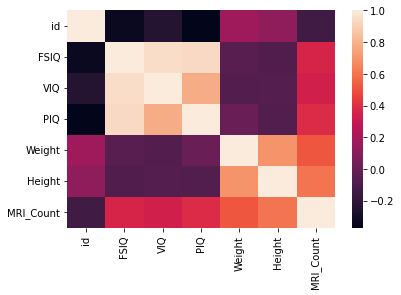

In [11]:
sb.heatmap(xcorr) # gives regular heatmap; annotations is set to false by-default

<AxesSubplot:>

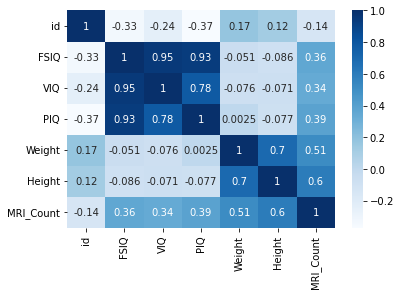

In [12]:
sb.heatmap(xcorr,cmap='Blues',annot=True) # cmap is color map; annot is annotation which is set to true